In [16]:
from SimPEG import Mesh, Utils, Maps, Survey
from SimPEG.EM.Static import DC, IP
from pymatsolver import MumpsSolver
from ipywidgets import interact, IntSlider
import sys
sys.path.append("./utilcodes/")
from vizutils import viz, gettopoCC, vizEJ
%pylab inline
import matplotlib
matplotlib.rcParams['font.size'] = 14

Populating the interactive namespace from numpy and matplotlib


# IP example: Gradient array with single source

### Linearization of induced polarization (IP) responses

$$ d^{IP} = F[\sigma(1-\eta)] - F[\sigma] $$
$$\simeq -\frac{\partial F[\sigma]}{\partial log(\sigma)} $$


- $F[\cdot]$: Static Maxwell's operator (taking $\sigma(x, y, z)$)

- $\eta$: Chargeability (ms or mV/V)

<img src="../images/DCIP_kimberlites.png" width=500> </img>

Python files for Forward and Inversion:
    
    NEED TO UPDATE LINKS
    
- Forward: https://github.com/simpeg/presentations/blob/ATEM/SciPy2016/notebooks/ATEM/TKCATEMfwd.py
- Inversion: https://github.com/simpeg/presentations/blob/ATEM/SciPy2016/notebooks/ATEM/TKCATEMinv.py

## Setup mesh, load model, design survey, and forward model DC data

In [19]:
run TKCExample_DCIPfwd.py

### Re-running the inverison will take a few minutes. Only uncomment the run statement below if you wish to re-run the inversion and see the output. Pickled results can be loaded below without re-running the inversion.

In [9]:
# run TKCExample_IPinv.py

## Visualize Conductivity and Chargeability Models

In [4]:
def compareTrueRecoveredMod(indz,indy):
    fig = plt.figure(figsize(11, 8))
    vmin, vmax = -4, -1
    xmin, xmax = -500+xc, 500+xc
    ymin, ymax = -500+yc, 500+yc
    zmin, zmax = -500+zc, 0+zc
#     indz = 28
#     indy = 31
    # Axis label
    x = np.linspace(xmin+200, xmax-200,3)
    matplotlib.rcParams['font.size'] = 10

    # True Conductivity Model z-section
    ax1 = plt.subplot(1,1,1)
    pos =  ax1.get_position()
    ax1.set_position([pos.x0-0.1, pos.y0+0.3,  pos.width*0.5, pos.height*0.5])
    ax1,dat1 = viz(mesh, sigma, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax1, cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax1.xaxis.set_visible(False)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)    
    ax1.set_ylabel('Northing (m)')

    # True Conductivity Model y-section
    pos =  ax1.get_position()
    ax2 = fig.add_axes([pos.x0+0.0525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax2, dat2 = viz(mesh, sigma, indy, airind, normal="Y", xc=xc,yc=yc,zc=zc, ax=ax2, cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax2.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(zmin, zmax) 
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)),size=12)
    ax2.set_xlabel('Easting (m)')
    ax2.set_ylabel('Elev. (m)')
    
    pos =  ax2.get_position()
    cbarax = fig.add_axes([pos.x0-0.15 , pos.y0-0.01 ,  pos.width, pos.height*0.05])  ## the parameters are the specified position you set
    cb = fig.colorbar(dat2[0],cax=cbarax, orientation="horizontal", ax = ax2, ticks=np.linspace(vmin,vmax, 4), format="1.e%.f")
    cb.set_label("Conductivity (S/m)",size=12)

    # True Chargeability Model z-section
    ax3 = fig.add_axes([pos.x0+0.3, pos.y0,  pos.width, pos.height])
    ax3,dat3 = ax = viz(mesh, eta, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax3, cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax3.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax3.xaxis.set_visible(False)
    ax3.yaxis.set_visible(False)
    ax3.set_xlim(xmin, xmax)
    ax3.set_ylim(ymin, ymax)

    # True Chargeability Model y-section
    ax4 = fig.add_axes([pos.x0+0.3525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax4, dat4 = viz(mesh, eta, indy, airind,  normal="Y", xc=xc,yc=yc,zc=zc, ax=ax4, cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax4.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax4.yaxis.set_visible(False)
    ax4.set_xlim(xmin, xmax)
    ax4.set_ylim(zmin, zmax) 
    ax4.set_xticks(map(int, x))
    ax4.set_xticklabels(map(str, map(int, x)),size=12)
    ax4.set_xlabel('Easting (m)')

    pos =  ax4.get_position()
    cbarax = fig.add_axes([pos.x0-0.15 , pos.y0-0.01 ,  pos.width, pos.height*0.05])  ## the parameters are the specified position you set
    cb = fig.colorbar(dat4[0],cax=cbarax, orientation="horizontal", ax = ax4, ticks=np.linspace(vmin,vmax, 4), format="1.e%.f")
    cb.set_label("Chargeability ()",size=12)

In [5]:
interact(lambda indz,indy: compareTrueModels(indz,indy), indz=IntSlider(min=0, max=mesh.nCz-1,step=1, value=28), indy=IntSlider(min=0, max=mesh.nCy-1,step=1, value=31))

NameError: name 'mesh' is not defined

## Mesh and Chargeability model

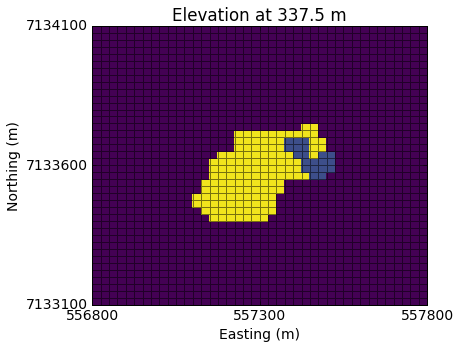

In [4]:
ax = viz(mesh, eta*1e3, 26, airind=airind, normal="Z", xc=xc, yc=yc, zc=zc, scale="linear", clim=(0, 1.6), label="Chargeability (ms)", cb=False)

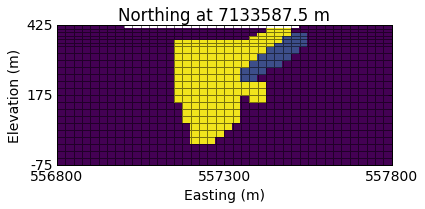

In [5]:
ax = viz(mesh, eta*1e3, 30, airind=airind, normal="Y", xc=xc, yc=yc, zc=zc, scale="linear", clim=(0, 1.6), label="Chargeability (ms)", cb=False)

## Obtain topographic surface from 3D conductivity model

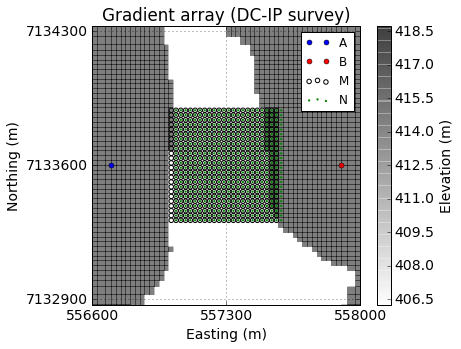

In [8]:
fig, ax = plt.subplots(1,1, figsize=(5*1.2,5))
dat = mesh2D.plotImage(topoCC,pcolorOpts={"cmap":"binary",'alpha':0.5}, ax=ax)
plt.xlabel("Easting (m)"); plt.ylabel("Northing (m)")
cb = plt.colorbar(dat[0]); cb.set_label("Elevation (m)")
ax.plot(Aloc1_x[0], Aloc1_x[1], 'bo', ms=5)
ax.plot(Bloc1_x[0], Bloc1_x[1], 'ro', ms=5)
ax.scatter(Mx[:,0], Mx[:,1],s=20, edgecolors="k", facecolors="none")
ax.scatter(Nx[:,0], Nx[:,1],s=5, edgecolors="none", facecolors="g")
ax.legend(("A", "B", "M", "N"), fontsize=12)
xmin, xmax = -700+xc, 700+xc
ymin, ymax = -700+yc, 700+yc
ax.set_xticks(np.linspace(xmin, xmax, 3))
ax.set_yticks(np.linspace(ymin, ymax, 3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.axis('equal')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")  
ax.set_title("Gradient array (DC-IP survey)")
ax.grid(True)
fig.savefig("./images/GradientArray", dpi=200)

In [12]:
# Obtain estimated 3D conductivity from DC inversion
sigopt = np.load("sigest.npy")

## Compute true IP data

In [13]:
# Generate true IP data using true conductivity model
eta = mesh.readModelUBC("VTKout_eta.dat")
actmapIP = Maps.InjectActiveCells(mesh, ~airind, 0.)
problemIP = IP.Problem3D_CC(mesh, rho=1./sigma, Ainv=problem.Ainv, f=f, mapping=actmapIP)
problemIP.Solver = MumpsSolver
surveyIP = IP.Survey([src1])
problemIP.pair(surveyIP)
dataIP = surveyIP.dpred(eta[~airind])

## Use estimated $\sigma (x, y, z)$ to compute sensitivity 

In [14]:
# Use estimated conductivity model to compute sensitivity function
survey = DC.Survey([src1])
problem = DC.Problem3D_CC(mesh)
problem.Solver = MumpsSolver
problem.pair(survey)
f = problem.fields(sigopt)
problemIP = IP.Problem3D_CC(mesh, rho=1./sigopt, Ainv=problem.Ainv, f=f, mapping=actmapIP)
problemIP.Solver = MumpsSolver
surveyIP = IP.Survey([src1])
problemIP.pair(surveyIP)

In [15]:
ipdata = Survey.Data(surveyIP, v=dataIP)

In [35]:
def vizdata(data, src, rx, rxcomponent="X", clim=None, title=None, figsave=None, ax=None, cb=True,cbOrient="vertical"):
    if ax is None:
        fig = plt.figure(figsize=(6.8, 5.5))
        ax = plt.subplot(111)

    temp = data[src, rx]
    if rxcomponent=="X":
        X = Xx.copy()
        Y = Yx.copy()
    else:
        X = Xy.copy()
        Y = Yy.copy()
    temp = temp.reshape(X.shape, order="F")
    if clim is not None:
        vmin, vmax = clim[0], clim[1]
        dat = ax.contourf(X, Y, temp, 20, clim=clim, vmin=vmin, vmax=vmax, cmap="plasma")
        ax.contour(X, Y, temp, 10, colors="k")
    else:
        vmin, vmax = temp.min(), temp.max()
        dat = ax.contourf(X, Y, temp, 20, cmap="plasma")
        ax.contour(X, Y, temp, 10, colors="k")
        
    if title is not None:
        ax.set_title(title)
    xmin, xmax = X.min(), X.max()
    ymin, ymax = Y.min(), Y.max()            
    ax.set_xlabel("Easting (m)")
    ax.set_ylabel("Northing (m)")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.set_xticks(np.linspace(xmin, xmax, 3))
    ax.set_yticks(np.linspace(ymin, ymax, 3))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)            
    ax.axis("equal")
    
    if cb:
        cb = plt.colorbar(dat, orientation=cbOrient, ticks=np.linspace(vmin, vmax, 3), format="%.1e")
        cb.set_label("Chargeability (ms)")
        
    if figsave is not None:
        fig.savefig(figsave, dpi=200)
    return ax
    

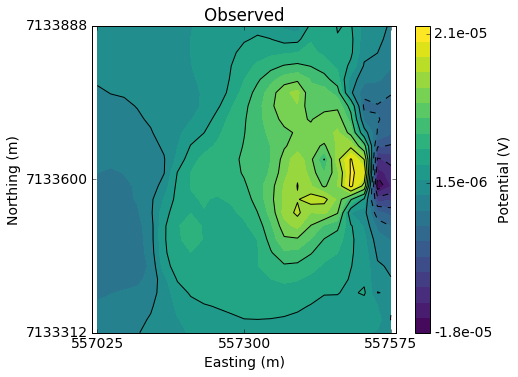

In [17]:
vizdata(ipdata, src1, rx_x, title="Observed", clim=(-1.8e-5, 2.1e-5))

(7133300.0, 7133900.0)

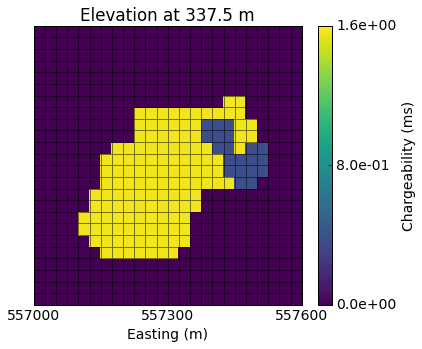

In [18]:
ax,dat = viz(mesh, eta*1e3, 26, airind=airind, normal="Z", scale="linear", clim=(0, 1.6), label="Chargeability (ms)", xc=xc, yc=yc, zc=zc)
xmin, xmax = -300+xc, 300+xc
ymin, ymax = -300+yc, 300+yc
ax.set_xticks(np.linspace(xmin, xmax, 3))
ax.set_yticks([]); ax.set_ylabel('')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)


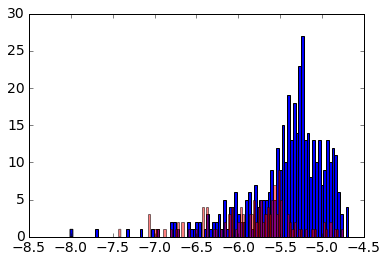

In [19]:
a = hist(np.log10(dataIP[dataIP>0.]), bins=100)
b = hist(np.log10(-dataIP[dataIP<0.]), bins=100, color='r', alpha=0.5)

## Depth weight

In [20]:
depth = 1./(abs(mesh.gridCC[:,2]-zc))**1.5
depth = depth/depth.max()

(-175.0, 425.0)

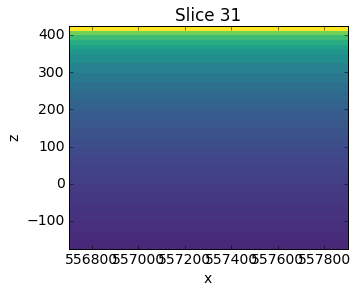

In [21]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
mesh.plotSlice(np.log10(depth), normal="Y", streamOpts={'color':'w'}, ax=ax, pcolorOpts={"cmap":"viridis"})
ax.set_xlim(-600+xc, 600+xc)
ax.set_ylim(-600+zc, 0.+zc)    

## Sensitivity weight?

In [24]:
m0 = np.ones(mesh.nC)[~airind]*1e-20

In [25]:
def matFun(v):
    y = problemIP.Jvec(m0, v, f=f)
    out = problemIP.Jtvec(m0, y, f=f)
    return out
weight_sense = np.sqrt(abs(Utils.diagEst(matFun, m0.size, k=2)))

In [26]:
abs(weight_sense).min()

0.00011488918193891081

In [27]:
weight = abs(weight_sense) / abs(weight_sense).max()
print np.log10(weight).min(), np.log10(weight).max()

-3.20440744948 0.0


In [28]:
print weight_sense.min(), weight_sense.max()

0.000114889181939 0.183944406713


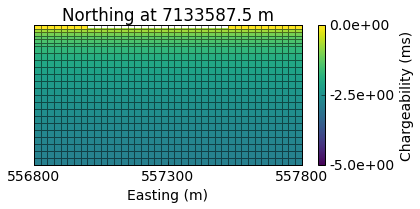

In [30]:
ax,dat = viz(mesh, np.log10(depth), 30, airind=airind, normal="Y", xc=xc, yc=yc, zc=zc, scale="linear", clim=(-5, 0.), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')

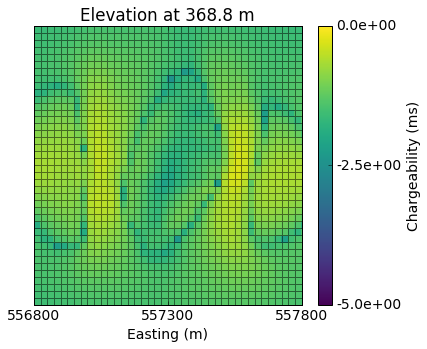

In [31]:
ax,dat = viz(mesh, actmapIP*np.log10(weight), 28, airind=airind, normal="Z", xc=xc, yc=yc, zc=zc, scale="linear", clim=(-5, 0.), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')

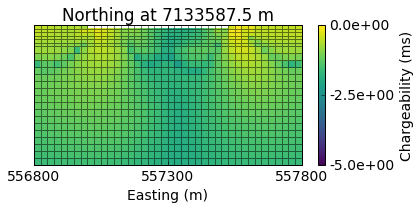

In [32]:
ax,dat = viz(mesh, actmapIP*np.log10(weight), 30, airind=airind, normal="Y", xc=xc, yc=yc, zc=zc, scale="linear", clim=(-5, 0.), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')

In [1]:
# from SimPEG import DataMisfit, Regularization, Optimization, Directives, InvProblem, Inversion
# std = 0.
# eps = abs(dataIP).max()*0.01
# surveyIP.std = std
# surveyIP.eps = eps
# m0 = np.ones(mesh.nC)[~airind]*1e-20
# regmap = Maps.IdentityMap(nP=m0.size)
# #TODO put warning when dobs is not set!
# surveyIP.dobs = dataIP
# dmisfit = DataMisfit.l2_DataMisfit(surveyIP)
# reg = Regularization.Simple(mesh, mapping=regmap, indActive=~airind)
# reg.wght = depth[~airind]
# # reg.wght = weight
# opt = Optimization.ProjectedGNCG(maxIter = 10)
# opt.lower = 0.
# invProb = InvProblem.BaseInvProblem(dmisfit, reg, opt)
# # Create an inversion object
# beta = Directives.BetaSchedule(coolingFactor=5, coolingRate=3)
# betaest = Directives.BetaEstimate_ByEig(beta0_ratio=1.)
# save = Directives.SaveOutputEveryIteration()
# target = Directives.TargetMisfit()
# # beta.beta = 10.
# savemodel = Directives.SaveModelEveryIteration()
# inv = Inversion.BaseInversion(invProb, directiveList=[betaest, beta, save, target, savemodel])
# reg.alpha_s = 1e-1
# reg.alpha_x = 1.
# reg.alpha_y = 1.
# reg.alpha_z = 1.
# problemIP.counter = opt.counter = Utils.Counter()
# opt.LSshorten = 0.5
# opt.remember('xc')
# # mIPopt = inv.run(m0)
# # problemIP.Ainv.clean()

NameError: name 'dataIP' is not defined

In [209]:
# XC = opt.recall('xc')

In [210]:
# dmisfit.eval(mIPopt)

In [26]:
import pickle
# eta_pred = actmapIP*mIPopt
# Results = {"model_true":eta, "model_pred":eta_pred, "Obs":surveyIP.dobs, "Pred":invProb.dpred}
# outputs = open("IPresults", 'wb')
# pickle.dump(Results, outputs)
# outputs.close()

IPresults = pickle.load(open("IPresults","rb"))

dobs = IPresults["Obs"]
dpred = IPresults["Pred"]
eta = IPresults["model_true"]
eta_pred = IPresults["model_pred"]


In [212]:
# dpred = invProb.dpred
# dobs = surveyIP.dobs

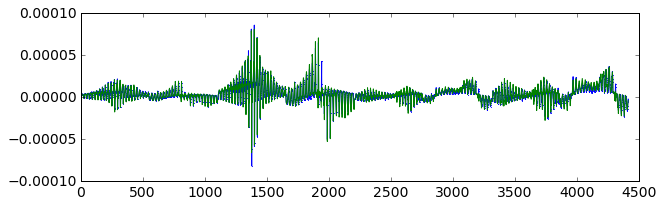

In [24]:
figsize(10, 3)
plt.plot(dpred, '.-', ms=1)
plt.plot(dobs)

In [38]:
ippred = Survey.Data(surveyIP, v=dpred)
ipobs = Survey.Data(surveyIP, v=dobs)

AssertionError: v must have the correct number of data.

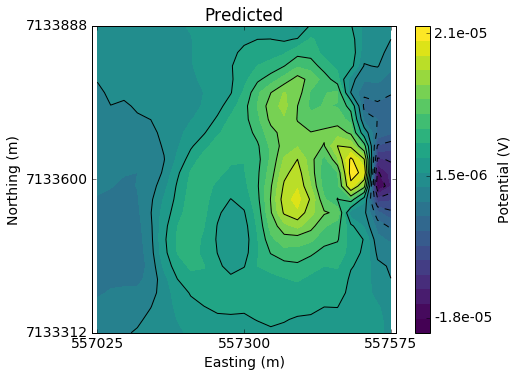

In [215]:
vizdata(ippred, src1, rx_x, title="Predicted", clim=(-1.8e-5, 2.1e-5))

/Users/Mike/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

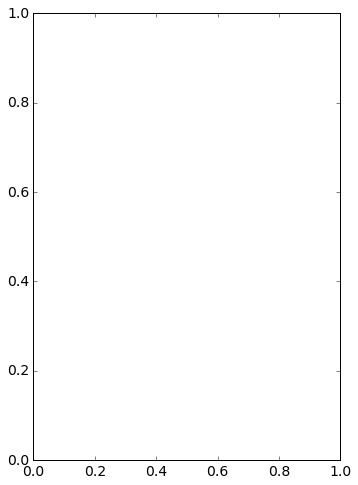

In [36]:
fig = plt.figure(figsize(11, 8))
xmin, xmax = -300+xc, 300+xc
ymin, ymax = -300+yc, 300+yc
indz = 28

# Axis label
x = np.linspace(xmin+100, xmax-100,3)

# DC observed data
ax1 = plt.subplot(1,1,1)
pos =  ax1.get_position()
ax1.set_position([pos.x0-0.1, pos.y0,  pos.width*0.5, pos.height])
ax1 = vizdata(ipobs, src1, rx_x, ax=ax1, rxcomponent="X", title="Observed DC Data", clim=(-1.8e-5, 2.1e-5), cb=False)
plt.gca().set_aspect('equal')
# ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
# ax1.xaxis.set_visible(False)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)   
ax1.set_xticks(map(int, x))
ax1.set_xticklabels(map(str, map(int, x)),size=12)
ax1.set_xlabel('Easting (m)')
ax1.set_ylabel('Northing (m)')
ax1.set

# DC Predicted data
ax2 = fig.add_axes([pos.x0+0.8, pos.y0,  pos.width, pos.height])
ax2 = vizdata(ippred, src1, rx_x, ax=ax2, rxcomponent="X", title="Predicted DC Data", clim=(-1.8e-5, 2.1e-5))
plt.gca().set_aspect('equal')
ax2.yaxis.set_visible(False)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=12)
ax2.set_xlabel('Easting (m)')

In [ ]:
fig = plt.figure(figsize(11, 8))
xmin, xmax = -300+xc, 300+xc
ymin, ymax = -300+yc, 300+yc
indz = 28

# Axis label
x = np.linspace(xmin+100, xmax-100,3)

# IP observed data
ax1 = plt.subplot(1,1,1)
pos =  ax1.get_position()
ax1.set_position([pos.x0-0.1, pos.y0,  pos.width*0.45, pos.height])
ax1 = vizdata(ippred, src1, rx_x, ax=ax1, rxcomponent="X", title="Observed", clim=(4.5e-3, 4.8e-1))
plt.gca().set_aspect('equal')
# ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
# ax1.xaxis.set_visible(False)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)   
ax1.set_xticks(map(int, x))
ax1.set_xticklabels(map(str, map(int, x)),size=12)
ax1.set_xlabel('Easting (m)')
ax1.set_ylabel('Northing (m)')
ax1.set

# True chargeability model
ax2 = fig.add_axes([pos.x0+0.75, pos.y0,  pos.width, pos.height])
ax2,dat2 = viz(mesh, eta*1e3, indz, airind, normal="Z", xc=xc, yc=yc, zc=zc, ax=ax2)
plt.gca().set_aspect('equal')
ax2.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
ax2.yaxis.set_visible(False)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=12)
ax2.set_xlabel('Easting (m)')
ax2.set_title('Conductivity Model')

In [216]:
from ipywidgets import interact, IntSlider

In [217]:
iteration = 10
eta_pred = actmapIP*mIPopt

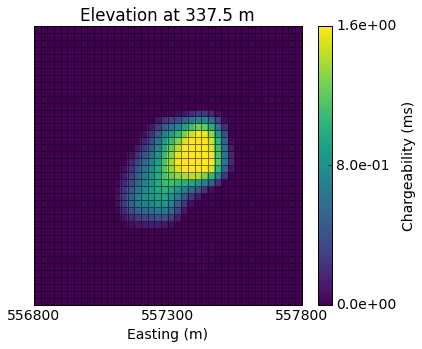

In [28]:
ax,dat = viz(mesh, eta_pred*1e3, 26, airind=airind, normal="Z", xc=xc, yc=yc, zc=zc, scale="linear", clim=(0, 1.6), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')

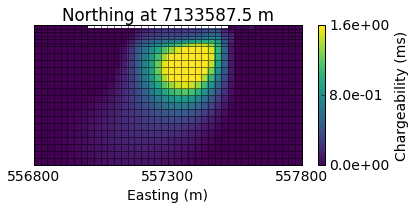

In [29]:
ax,dat = viz(mesh, eta_pred*1e3, 30, airind=airind, normal="Y", xc=xc, yc=yc, zc=zc, scale="linear", clim=(0, 1.6), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')


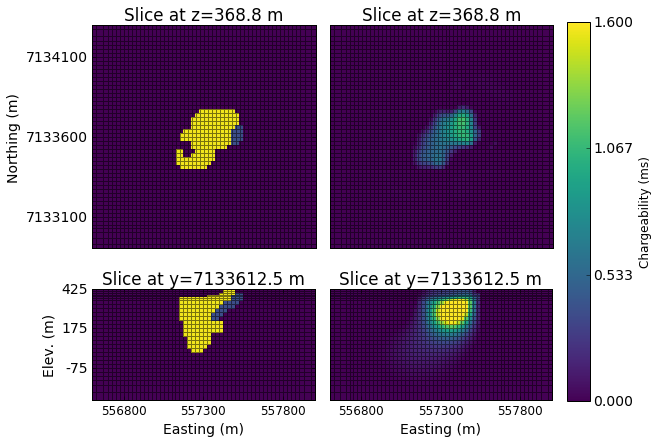

In [33]:
fig = plt.figure(figsize(11, 8))
vmin, vmax = 0., 1.6
xmin, xmax = -700+xc, 700+xc
ymin, ymax = -700+yc, 700+yc
zmin, zmax = -700+zc, 0+zc
indz = 28
indy = 31
# Axis label
x = np.linspace(xmin+200, xmax-200,3)

# True Chargeability Model z-section
ax1 = plt.subplot(1,1,1)
pos =  ax1.get_position()
ax1.set_position([pos.x0-0.1, pos.y0+0.3,  pos.width*0.5, pos.height*0.5])
ax1,dat1 = viz(mesh, eta*1e3, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax1, scale="linear", cb=False, clim=(vmin, vmax))
plt.gca().set_aspect('equal')
ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
ax1.xaxis.set_visible(False)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)    
ax1.set_ylabel('Northing (m)')

# True Chargeability Model y-section
pos =  ax1.get_position()
ax2 = fig.add_axes([pos.x0+0.0525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
ax2, dat2 = viz(mesh, eta*1e3, indy, airind, normal="Y", xc=xc,yc=yc,zc=zc, ax=ax2, scale="linear", cb=False, clim=(vmin, vmax))
plt.gca().set_aspect('equal')
ax2.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(zmin, zmax) 
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=12)
ax2.set_xlabel('Easting (m)')
ax2.set_ylabel('Elev. (m)')

# IP Recovered Model z-section
ax3 = fig.add_axes([pos.x0+0.3, pos.y0,  pos.width, pos.height])
ax3,dat3 = ax = viz(mesh, eta_pred*1e3, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax3, scale="linear", cb=False, clim=(vmin, vmax))
plt.gca().set_aspect('equal')
ax3.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)

# IP Recovered Model y-section
ax4 = fig.add_axes([pos.x0+0.3525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
ax4, dat4 = viz(mesh, eta_pred*1e3, indy, airind,  normal="Y", xc=xc,yc=yc,zc=zc, ax=ax4, scale="linear", cb=False, clim=(vmin, vmax))
plt.gca().set_aspect('equal')
ax4.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
ax4.yaxis.set_visible(False)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(zmin, zmax) 
ax4.set_xticks(map(int, x))
ax4.set_xticklabels(map(str, map(int, x)),size=12)
ax4.set_xlabel('Easting (m)')

pos =  ax4.get_position()
cbarax = fig.add_axes([pos.x0+0.3 , pos.y0+0.095 ,  pos.width*0.1, pos.height*1.7])  ## the parameters are the specified position you set
cb = fig.colorbar(dat[0],cax=cbarax, orientation="vertical", ax = ax4, ticks=np.linspace(vmin,vmax, 4))

cb.set_label("Chargeability (ms)",size=12)
# fig.savefig('MAG_RecModel.png',dpi = 200)
